<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_026_OverFittingUnderFitingDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Social_Network_Ads.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshrau/social-network-ads",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3658074777.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'social-network-ads' dataset.
First 5 records:     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [8]:
df['Purchased'].unique()

array([0, 1])

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [16]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
def analyzer(max_depth):
  x_val = X[['Age','EstimatedSalary']].values
  y_val = y.values
  scaler=StandardScaler()
  x_val = scaler.fit_transform(x_val)
  clf = DecisionTreeClassifier(max_depth=max_depth,criterion='gini')
  clf.fit(x_val,y_val)

  x_min,x_max = x_val[:,0].min() - 1, x_val[:,0].max() + 1
  y_min,y_max = x_val[:,1].min() - 1, x_val[:,1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                       np.arange(y_min,y_max,0.01))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,alpha=0.8)
  plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val, edgecolors='k', marker='o')
  plt.title(f'Decision Tree Decision Regions (max_depth={max_depth})')
  plt.xlabel('Age (Scaled)')
  plt.ylabel('EstimatedSalary (Scaled)')
  plt.show()

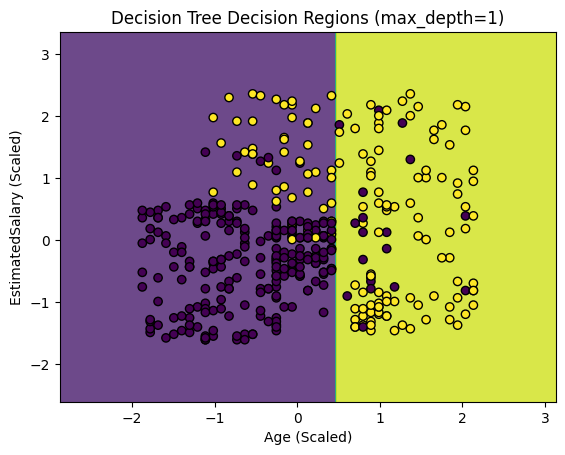

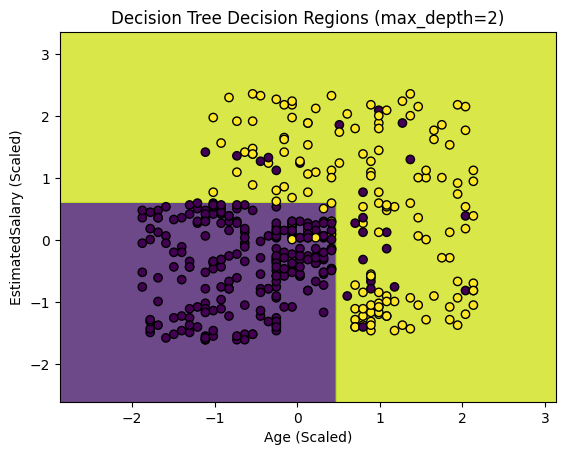

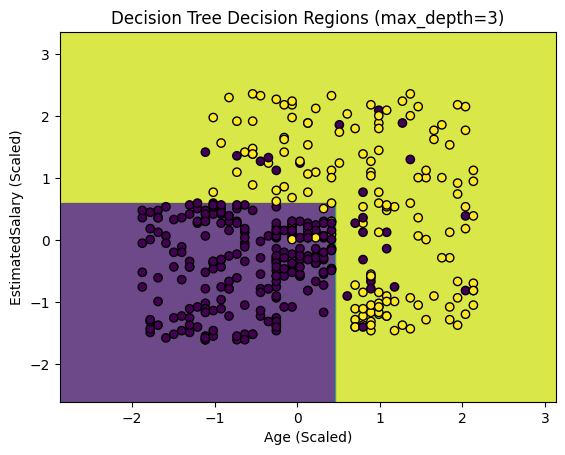

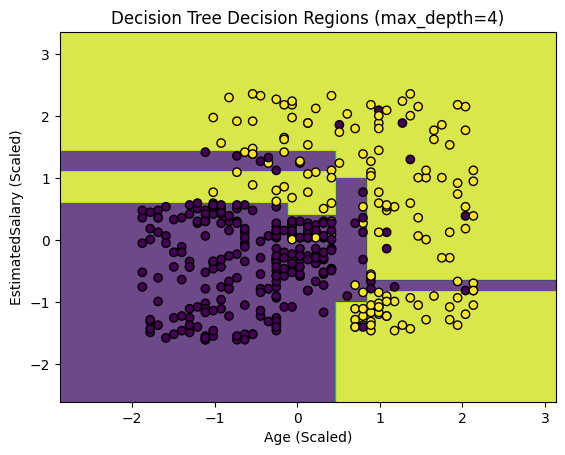

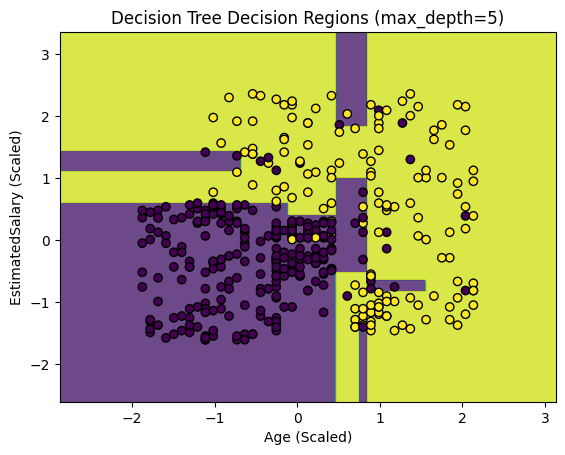

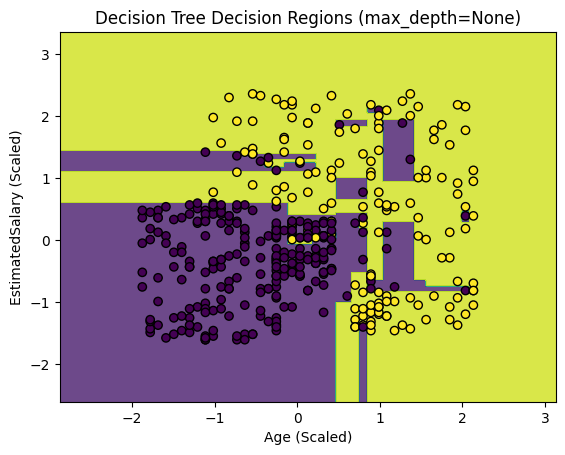

In [26]:
for i in range(1,6):
  analyzer(i)
analyzer(None)